# Productivity Predictor

## Goal

Productivity Prediction of Garment Employees

## Data

We will use the [Productivity Prediction of Garment Employees](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees) set from the UCI Machine Learning Repository. 

- **date**			:	Date in MM-DD-YYYY
- **day**			:	Day of the Week
- **quarter**			:	A portion of the month. A month was divided into four quarters
- **department**		:	Associated department with the instance
- **team_no**			:	Associated team number with the instance
- **no_of_workers**		:	Number of workers in each team
- **no_of_style_change**	:	Number of changes in the style of a particular product
- **targeted_productivity**	:	Targeted productivity set by the Authority for each team for each day.
- **smv**			:	Standard Minute Value, it is the allocated time for a task
- **wip**			:	Work in progress. Includes the number of unfinished items for products
- **over_time**		:	Represents the amount of overtime by each team in minutes
- **incentive**		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- **idle_time**		:	The amount of time when the production was interrupted due to several reasons
- **idle_men**		:	The number of workers who were idle due to production interruption
- **actual_productivity**	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

The data can be used to predict the productivity or to classify it by stratifying the target variable

## Libraries

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV


## Model Development

### Load data

In [107]:
prod = pd.read_csv('data/garments_worker_productivity.csv')

### EDA

In [108]:
prod.shape

(1197, 15)

In [109]:
prod.isna().sum() / prod.shape[0] * 100.0

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [110]:
prod.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [111]:
prod_num = list(prod.select_dtypes(['number']).columns)
prod_cat = list(prod.select_dtypes(include=['object']).columns)

In [112]:
for column in prod_cat:
    print(column, ':')
    print(prod[column].unique())
    print('\n')

date :
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']


quarter :
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department :
['sweing' 'finishing ' 'finishing']


day :
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']




In [113]:
prod[prod['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


In [114]:
# avg targeted prod per team

tar_prod = round( prod[['team','targeted_productivity']].groupby('team').mean() * 100.0, 2)
tar_prod
# sns.barplot(x='team', y='targeted_productivity', data=tar_prod)

,targeted_productivity
team,
1,74.67
2,73.99
3,74.21
4,71.76
5,67.37
6,73.14
7,71.43
8,70.83
9,75.82


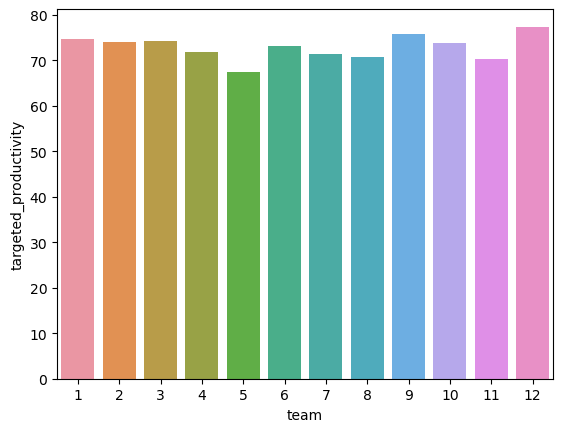

In [115]:
tar_prod = tar_prod.reset_index()
sns.barplot(x='team', y='targeted_productivity', data=tar_prod)
plt.show()

In [116]:
prod['date'] = pd.to_datetime(prod['date'])
prod['day_of_week'] = prod['date'].dt.day_name()
print(prod['day_of_week'].unique())

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


#### Observations

- There is a feature with missing data, wip
  - In factories it is an important value, so lets try to save it rather than dropping it
  - Can we assume that the missing data is equals 0?
- The department column has two values for finishing
- The quarter column looks dirty, there's a Quarter5
- No team has a targeted productivity above 80%
- They don't operate on Fridays? That is interesting

Needs cleaning: quarter, department, wip features

### Feature Engineering I

In [117]:
prod['department'] = prod['department'].apply(lambda x: 'finishing' if x == 'finishing ' else x)

In [118]:
prod['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [119]:
prod.date.unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2015-01-03 00:00:00', '2015-01-04 00:00:00',
 '2015-01-05 00:00:00', '2015-01-06 00:00:00', '2015-01-07 00:00:00',
 '2015-01-08 00:00:00', '2015-01-10 00:00:00', '2015-01-11 00:00:00',
 '2015-01-12 00:00:00', '2015-01-13 00:00:00', '2015-01-14 00:00:00',
 '2015-01-15 00:00:00', '2015-01-17 00:00:00', '2015-01-18 00:00:00',
 '2015-01-19 00:00:00', '2015-01-20 00:00:00', '2015-01-21 00:00:00',
 '2015-01-22 00:00:00', '2015-01-24 00:00:00', '2015-01-25 00:00:00',
 '2015-01-26 00:00:00', '2015-01-27 00:00:00', '2015-01-28 00:00:00',
 '2015-01-29 00:00:00', '2015-01-31 00:00:00', '2015-02-01 00:00:00',
 '2015-02-02 00:00:00', '2015-02-03 00:00:00', '2015-02-04 00:00:00',
 '2015-02-05 00:00:00', '2015-02-07 00:00:00', '2015-02-08 00:00:00',
 '2015-02-09 00:00:00', '2015-02-10 00:00:00', '2015-02-11 00:00:00',
 '2015-02-12 00:00:00', '2015-02-14 00:00:00', '2015-02-15 00:00:00',
 '2015-02-16 00:00:00', '2015-02-17 00:00:00', '2015-02-18 00:00:00',
 '20

The data only has data from the first quarter, lets drop the quarter feature

In [120]:
prod.drop('quarter', axis=1, inplace=True)

Because we don't have a lot of data from other months one for the first quarter we will drop the date colum all together and just keep the day of the week.

In [121]:
prod.drop('date', axis=1, inplace=True)

In [122]:
prod['wip'] = prod['wip'].fillna(0)

<Axes: xlabel='wip', ylabel='Count'>

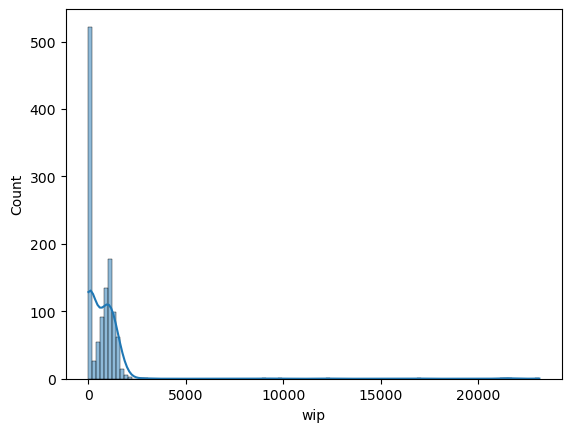

In [123]:
sns.histplot(prod.wip, kde=True)

There's so many 0s now, another way to approach this can be by instead of using 0 using the mean, the values looks like the are normally distributed. But if the company embraces lean manufacturing this can be expected so we are going to leave them as 0s

### Data Scaling and Encoding

In [124]:
# Encoding the categorical features, no need to worry about ordinal categorical features
prod = pd.get_dummies(prod)

In [125]:
minmax = MinMaxScaler()
 
prod_columns = prod.columns
prod = minmax.fit_transform(prod)
prod = pd.DataFrame(prod, columns=prod_columns)

In [126]:
prod

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0.636364,1.000000,0.450252,0.047920,0.273148,0.027222,0.0,0.0,0.0,0.655172,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.931507,0.020132,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.909091,1.000000,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.000000,1.000000,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.454545,1.000000,0.445219,0.050601,0.074074,0.013889,0.0,0.0,0.0,0.620690,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.818182,0.931507,0.000000,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1193,0.636364,0.863014,0.019357,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1194,0.545455,0.794521,0.019357,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1195,0.727273,0.931507,0.000000,0.000000,0.069444,0.000000,0.0,0.0,0.0,0.149425,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Split data

In [127]:
y = prod.actual_productivity
X = prod.drop('actual_productivity', axis=1)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Model fitting I

In [136]:
dtr_model1 = DecisionTreeRegressor(max_depth=4)

dtr_model1.fit(X_train, y_train)

y_pred_model1 = dtr_model1.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred_model1))

R-squared: 0.2590885345203323


This simple decision tree is capable of explaining just 25%, let's check the relevant features.

In [139]:
feature_names = X.columns
feature_importances = dtr_model1.feature_importances_

df_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

df_importances = df_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
df_importances

,Feature,Importance
0,targeted_productivity,0.431770
1,incentive,0.182724
2,smv,0.158754
3,over_time,0.092977
4,team,0.060222
5,no_of_workers,0.049526
6,day_of_week_Saturday,0.024027
7,day_Thursday,0.000000
8,day_of_week_Tuesday,0.000000
9,day_of_week_Thursday,0.000000


It is really interesting how the most important feature is targeted_productivity, it is the main driver for people because the most probable is that if they don't reach it they can face consequences. On the other side of the spectrum the incentive is also the other main driver to predict productivity. 

### Model fitting II

Let's try to get better results by doing some hyperparameter exploration

In [141]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [3, 5 , 7],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 10, 20, 25, 50],
    
}


gs = GridSearchCV(DecisionTreeRegressor(), param_grid=params)
gs.fit(X_train, y_train)

best_params = gs.best_params_
best_score = gs.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}
Best score: 0.39478318277275726


We were able to raise the accuracy to 40% but is not enough

In [142]:
feature_names = X.columns
feature_importances = gs.best_estimator_.feature_importances_

df_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

df_importances = df_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
df_importances

,Feature,Importance
0,targeted_productivity,0.404299
1,incentive,0.223631
2,smv,0.152875
3,over_time,0.093875
4,team,0.086026
5,no_of_workers,0.032003
6,wip,0.007291
7,day_Thursday,0.000000
8,day_of_week_Tuesday,0.000000
9,day_of_week_Thursday,0.000000


### Model fitting III

Based on the previous two model fittings, let's fit a new tree using the best hyperparameter and the best features based on its importance to see if we can get a better performance

In [151]:
important_features = list(df_importances['Feature'].head(5).values)
important_features

['targeted_productivity', 'incentive', 'smv', 'over_time', 'team']

In [154]:
X_test_trunc = X_test[important_features]
X_train_trunc = X_train[important_features]

dtr_model3 = DecisionTreeRegressor(criterion='squared_error', max_depth=5, min_samples_leaf=20, min_samples_split=10)

dtr_model3.fit(X_train_trunc, y_train)

y_pred_model3 = dtr_model3.predict(X_test_trunc)

print("R-squared:", r2_score(y_test, y_pred_model3))

R-squared: 0.2535345697631187


No it performed worst, but we ignored 2 features with significance in our grid search exploration: no_of_workers and wip... this can be the reason we are losing predictability let's see

### Model fitting IV

In [155]:
important_features = list(df_importances['Feature'].head(7).values)
important_features

['targeted_productivity',
 'incentive',
 'smv',
 'over_time',
 'team',
 'no_of_workers',
 'wip']

In [156]:
X_test_trunc = X_test[important_features]
X_train_trunc = X_train[important_features]

dtr_model4 = DecisionTreeRegressor(criterion='squared_error', max_depth=5, min_samples_leaf=20, min_samples_split=10)

dtr_model4.fit(X_train_trunc, y_train)

y_pred_model4 = dtr_model4.predict(X_test_trunc)

print("R-squared:", r2_score(y_test, y_pred_model3))

R-squared: 0.2535345697631187


We got the same results, using the full data plus the best model from the grid search.<br>
Out of curiosity lets see how the correlations look like

In [163]:
abs(prod.corr()['actual_productivity']).sort_values(ascending=False)

actual_productivity      1.000000
targeted_productivity    0.421594
no_of_style_change       0.207366
idle_men                 0.181734
team                     0.148753
smv                      0.122089
department_sweing        0.087624
department_finishing     0.087624
idle_time                0.080851
incentive                0.076538
no_of_workers            0.057991
over_time                0.054206
wip                      0.047389
day_Saturday             0.041539
day_of_week_Saturday     0.041539
day_of_week_Thursday     0.031875
day_Thursday             0.031875
day_Tuesday              0.019600
day_of_week_Tuesday      0.019600
day_Sunday               0.016808
day_of_week_Sunday       0.016808
day_Wednesday            0.012172
day_of_week_Wednesday    0.012172
day_of_week_Monday       0.001017
day_Monday               0.001017
Name: actual_productivity, dtype: float64